
# ÈóÆÈ¢ò‰∏â ¬∑ Â§öÂõ†Á¥† + Ê£ÄÊµãËØØÂ∑Æ + ËææÊ†áÊØî‰æãÔºàY‚â•4%ÔºâÁöÑ‰∏§Èò∂ÊÆµNIPTÊó∂ÁÇπÈÄâÊã© ‚Äî‚Äî Á´ØÂà∞Á´ØÂÆûÁé∞

> ÁõÆÊ†áÔºö‰æùÊçÆ **BMI** ÁªôÂá∫ÂêàÁêÜÂàÜÁªÑÔºåÂπ∂‰∏∫**ÂêÑÁªÑ**ÁªôÂá∫ÂçïÊ¨°‰∏é‰∏§Èò∂ÊÆµÁöÑÊúÄ‰Ω≥ NIPT Â≠ïÂë®Ôºå‰ΩøÊΩúÂú®È£éÈô©ÊúÄÂ∞èÔºàÂÖºÈ°æÊó©ÊúüÂèëÁé∞‰∏éÂÖÖÂàÜËææÊ†áÔºâ„ÄÇ

**Êï∞ÊçÆÊñá‰ª∂**Ôºö`/mnt/data/Áî∑ËÉéÊ£ÄÊµãÊï∞ÊçÆ_È¢ÑÂ§ÑÁêÜÂêé.csv`  
**ÁîüÊàêÊó∂Èó¥**ÔºöÊ≠§ Notebook Áî±ËÑöÊú¨Ëá™Âä®ÁîüÊàêÔºåÂèØÁõ¥Êé•ËøêË°åÊØè‰∏ÄÊ≠•„ÄÇ

---
**ËµõÈ¢òÂÖ≥ÈîÆÁ∫¶ÊùüÔºàÂºïÁî®Ôºâ**ÔºöNIPT ÂèØÂú® 10‚Äì25 Âë®ËøõË°åÔºõËã•**Áî∑ËÉé Y ÊµìÂ∫¶‚â•4%**ÂèØËÆ§‰∏∫ÁªìÊûúÂü∫Êú¨ÂáÜÁ°ÆÔºõÊó©ÊúüÔºà‚â§12Âë®ÔºâÈ£éÈô©‰Ωé„ÄÅ‰∏≠ÊúüÔºà13‚Äì27Âë®ÔºâÈ´ò„ÄÅÊôöÊúüÔºà‚â•28Âë®ÔºâÊûÅÈ´òÔºåÁî®‰∫éÊûÑÂª∫È£éÈô©‰ª£‰ª∑ÂáΩÊï∞‰∏éÁ≠ñÁï•‰ºòÂåñ„ÄÇ


In [1]:
# %% [markdown]
# ## 0. ÁéØÂ¢É‰∏é‰æùËµñ
# - Âª∫ËÆÆ Python ‚â• 3.9ÔºåÂ∑≤Áî®Âà∞ÁöÑÂ∫ìÔºöpandas„ÄÅnumpy„ÄÅscikit-learn„ÄÅmatplotlib„ÄÅstatsmodelsÔºàÂèØÈÄâÔºâ„ÄÇ
# - Ëã•ÈÉ®ÂàÜÂ∫ìÊú™ÂÆâË£ÖÔºåÂèØÊ≥®ÈáäÂØπÂ∫îÂäüËÉΩÊàñ‰ΩøÁî®ÂèØÈÄâÊõø‰ª£ÂÆûÁé∞„ÄÇ
# - ÊâÄÊúâÈöèÊú∫ËøáÁ®ãÂùáËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰æøÂ§çÁé∞„ÄÇ

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_STATE = 2025
np.random.seed(RANDOM_STATE)

# ÂèØÈÄâÔºöÂ∞ùËØïÂØºÂÖ• sklearn ‰∏é statsmodelsÔºàËã•‰∏çÂèØÁî®ÔºåÂêéÁª≠‰ºöËá™Âä®ÈôçÁ∫ßÂäüËÉΩÔºâ
try:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    SKLEARN_AVAILABLE = True
except Exception:
    SKLEARN_AVAILABLE = False

try:
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    STATSMODELS_AVAILABLE = True
except Exception:
    STATSMODELS_AVAILABLE = False

DATA_PATH = r"..\Q1\Áî∑ËÉéÊ£ÄÊµãÊï∞ÊçÆ_È¢ÑÂ§ÑÁêÜÂêé.csv"

In [2]:

# %% [markdown]
# ## 1. ËØªÂèñÊï∞ÊçÆ & Â≠óÊÆµÊò†Â∞Ñ
# - Ëá™Âä®ËØÜÂà´‰∏≠ÊñáÂàóÂêçÔºõ
# - Áªü‰∏ÄÂÖ≥ÈîÆÂ≠óÊÆµÔºåÊûÑÈÄ†Ê†áÁ≠æÔºöÊòØÂê¶ËææÊ†á (hit = YÊµìÂ∫¶‚â•4%)Ôºõ
# - ‰ª•‚ÄúÂçïÊ¨°Ê£ÄÊµã‚Äù‰∏∫ËÆ∞ÂΩïÂçï‰ΩçÔºõÂêéÁª≠ÊåâÂ≠ïÂ¶áIDËÅöÂêàÊûÑÈÄ†‚ÄúÊúÄÊó©ËææÊ†áÊó∂Èó¥‚Äù„ÄÇ

# %%
import pandas as pd

# Â∞ùËØïÂ∏∏ËßÅÁºñÁ†ÅËØªÂèñ
_encodings = ["utf-8-sig", "gbk", "utf-8"]
last_err = None
df = None
for enc in _encodings:
    try:
        df = pd.read_csv(DATA_PATH, encoding=enc)
        break
    except Exception as e:
        last_err = e

if df is None:
    raise RuntimeError(f"ËØªÂèñCSVÂ§±Ë¥•ÔºåËØ∑Ê£ÄÊü•ÁºñÁ†Å/ÂàÜÈöîÁ¨¶: {last_err}")

print("Êï∞ÊçÆËßÑÊ®°Ôºö", df.shape)
df.head(3)


Êï∞ÊçÆËßÑÊ®°Ôºö (1082, 31)


Â∫èÂè∑  Â≠ïÂ¶á‰ª£Á†Å  Âπ¥ÈæÑ     Ë∫´È´ò    ‰ΩìÈáç        Êú´Ê¨°ÊúàÁªè IVFÂ¶äÂ®†        Ê£ÄÊµãÊó•Êúü  Ê£ÄÊµãÊäΩË°ÄÊ¨°Êï∞   Ê£ÄÊµãÂ≠ïÂë®  \
0   1  A001  31  160.0  72.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-04-29       1  11.86   
1   2  A001  31  160.0  73.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-05-31       2  15.86   
2   3  A001  31  160.0  73.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-06-25       3  20.14   

   ...    YÊüìËâ≤‰ΩìÊµìÂ∫¶    XÊüìËâ≤‰ΩìÊµìÂ∫¶  13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã  \
0  ...  0.025936  0.038061     0.377069     0.389803     0.399399    0.027484   
1  ...  0.034887  0.059572     0.371542     0.384771     0.391706    0.019617   
2  ...  0.066171  0.075995     0.377449     0.390582     0.399480    0.022312   

   ÊüìËâ≤‰ΩìÁöÑÈùûÊï¥ÂÄç‰Ωì  ÊÄÄÂ≠ïÊ¨°Êï∞  Áîü‰∫ßÊ¨°Êï∞  ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑  
0       NaN     1     0       ÊòØ  
1       NaN     1     0       ÊòØ  
2       NaN     1     0       ÊòØ  

[3 rows x 31 columns]

In [9]:
# %% [markdown]
# ### 1.1 Â≠óÊÆµÊ†áÂáÜÂåñÔºàËá™Âä®ÂåπÈÖçÔºâ
# Ê†πÊçÆ‰∏é"ËææÊ†áÊó∂Èó¥"ÁöÑÂÖ≥ËÅîÊÄßÔºåÁ≤æÈÄâÂÖ≥ÈîÆÂ≠óÊÆµÔºö
# **‰∏ªÊïàÂ∫îÂèòÈáè**Ôºöga_weeks(J), bmi(K), ivf(G), weight(E)
# **ÊäÄÊúØÂçèÂèòÈáè**ÔºàÁî®‰∫éÈôçÂô™/Âä†ÊùÉÔºâÔºöraw_reads(L), map_ratio(M), dup_ratio(N), uniq_reads(O), 
#   gc_global(P), gc13(X), gc18(Y), gc21(Z), filt_ratio(AA)
# **Ê¨°Ë¶ÅÂèòÈáè**ÔºàÊïèÊÑüÊÄßÂàÜÊûêÔºâÔºöage(C), height(D)
# **Âà†Èô§ÁöÑÂº±ÂÖ≥ËÅîÂèòÈáè**Ôºö
#   - draw_count(I): ÊµÅÁ®ãÂèòÈáèÔºåÈùûÁîüÁâ©Â≠¶ÂÜ≥ÂÆöÂõ†Á¥†
#   - aneuploidy/outcome: ÁªìÂ±ÄÂèòÈáèÔºåÂØπFFÂΩ±Âìç‰∏çÁ®≥ÂÆö
#   - lmp_date/test_date: Â∑≤ÈÄöËøága_weeks‰ΩìÁé∞
#   - gravida/para: ‰∏éÂΩìÂâçÂ¶äÂ®†FFËææÊ†áÊó∂Èó¥ÂÖ≥ËÅî‰∏çÁõ¥Êé•
#   - zÂÄºÂíåx_frac: ‰øùÁïôy_frac‰Ωú‰∏∫ÁõÆÊ†áÔºåÂÖ∂‰ªñÊüìËâ≤‰Ωì‰ø°ÊÅØÂÜó‰Ωô

# %%
import re

col = {c:str(c).strip() for c in df.columns}

# ÁîüÊàê‰∏Ä‰∏™ÁÆÄÂåñÁöÑÊü•ÊâæÂ≠óÂÖ∏
def _key(s):
    return re.sub(r"\s+","",str(s))

rev = { _key(v):v for v in col.values() }

def pick(keys):
    for k in keys:
        k0 = _key(k)
        if k0 in rev: 
            return rev[k0]
    return None

# Á≤æÈÄâÂ≠óÊÆµÊò†Â∞ÑÔºöÈáçÁÇπÂÖ≥Ê≥®‰∏é"ËææÊ†áÊó∂Èó¥"Áõ¥Êé•Áõ∏ÂÖ≥ÁöÑÂèòÈáè
mapping = {
    # ‰∏ªÊïàÂ∫îÂèòÈáèÔºàÁõ¥Êé•ÂΩ±ÂìçËææÊ†áÊó∂Èó¥Ôºâ
    "ga_weeks": pick(["Ê£ÄÊµãÂ≠ïÂë®","Â≠ïÂ¶áÊú¨Ê¨°Ê£ÄÊµãÊó∂ÁöÑÂ≠ïÂë®ÔºàÂë®Êï∞+Â§©Êï∞Ôºâ","Â≠ïÂë®"]),
    "bmi": pick(["Â≠ïÂ¶áBMI","Â≠ïÂ¶á BMI ÊåáÊ†á","BMI"]),
    "ivf": pick(["IVFÂ¶äÂ®†","IVF Â¶äÂ®†ÊñπÂºè","Â¶äÂ®†ÊñπÂºè"]),
    "weight": pick(["‰ΩìÈáç","Â≠ïÂ¶á‰ΩìÈáç"]),
    
    # ÁõÆÊ†áÂèòÈáè
    "y_frac": pick(["YÊüìËâ≤‰ΩìÊµìÂ∫¶"]),
    
    # ÊäÄÊúØÂçèÂèòÈáèÔºàÁî®‰∫éË¥®ÈáèÊéßÂà∂ÂíåÊùÉÈáçÔºâ
    "raw_reads": pick(["ÂéüÂßãËØªÊÆµÊï∞","ÂéüÂßãÊµãÂ∫èÊï∞ÊçÆÁöÑÊÄªËØªÊÆµÊï∞Ôºà‰∏™Ôºâ"]),
    "map_ratio": pick(["Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã"]),
    "dup_ratio": pick(["ÈáçÂ§çËØªÊÆµÁöÑÊØî‰æã"]),
    "uniq_reads": pick(["ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞","ÊÄªËØªÊÆµÊï∞‰∏≠ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞Ôºà‰∏™Ôºâ"]),
    "gc_global": pick(["GCÂê´Èáè","P GC Âê´Èáè"]),
    "gc13": pick(["13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè"]),
    "gc18": pick(["18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè"]),
    "gc21": pick(["21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè"]),
    "filt_ratio": pick(["Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã"]),
    
    # Ê¨°Ë¶ÅÂèòÈáèÔºàÁî®‰∫éÊïèÊÑüÊÄßÂàÜÊûêÔºâ
    "age": pick(["Âπ¥ÈæÑ","Â≠ïÂ¶áÂπ¥ÈæÑ"]),
    "height": pick(["Ë∫´È´ò","Â≠ïÂ¶áË∫´È´ò"]),
    
    # ID Áõ∏ÂÖ≥
    "patient_code": pick(["Â≠ïÂ¶á‰ª£Á†Å","Ê†∑Êú¨Â∫èÂè∑","Ê†∑Êú¨ID","A Ê†∑Êú¨Â∫èÂè∑","B Â≠ïÂ¶á‰ª£Á†Å"]),
}

print("Á≤æÈÄâÂ≠óÊÆµÊò†Â∞ÑÂÆåÊàêÔºåÂà†Èô§‰∫Ü‰∏éËææÊ†áÊó∂Èó¥ÂÖ≥ËÅîËæÉÂº±ÁöÑÂèòÈáè")
mapping

Á≤æÈÄâÂ≠óÊÆµÊò†Â∞ÑÂÆåÊàêÔºåÂà†Èô§‰∫Ü‰∏éËææÊ†áÊó∂Èó¥ÂÖ≥ËÅîËæÉÂº±ÁöÑÂèòÈáè


{'ga_weeks': 'Ê£ÄÊµãÂ≠ïÂë®',
 'bmi': 'Â≠ïÂ¶áBMI',
 'ivf': 'IVFÂ¶äÂ®†',
 'weight': '‰ΩìÈáç',
 'y_frac': 'YÊüìËâ≤‰ΩìÊµìÂ∫¶',
 'raw_reads': 'ÂéüÂßãËØªÊÆµÊï∞',
 'map_ratio': 'Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã',
 'dup_ratio': 'ÈáçÂ§çËØªÊÆµÁöÑÊØî‰æã',
 'uniq_reads': 'ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞',
 'gc_global': 'GCÂê´Èáè',
 'gc13': '13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè',
 'gc18': '18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè',
 'gc21': '21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè',
 'filt_ratio': 'Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã',
 'age': 'Âπ¥ÈæÑ',
 'height': 'Ë∫´È´ò',
 'patient_code': 'Â≠ïÂ¶á‰ª£Á†Å'}

In [10]:
# %% [markdown]
# ### 1.2 ÊûÑÈÄ†Ê†áÂáÜÂ≠óÊÆµ‰∏éÊ†áÁ≠æ
# - `ga_weeks`: Â∞Ü"xÂë®yÂ§©"ËΩ¨Êç¢‰∏∫Â∞èÊï∞Âë®Ôºà‰∏ªÊïàÂ∫îÂèòÈáèÔºâÔºõ
# - `hit`: ÊòØÂê¶ËææÊ†áÔºàYÊµìÂ∫¶‚â•4%ÔºâÁõÆÊ†áÊ†áÁ≠æÔºõ
# - `patient_id`: Ëã•Áº∫Â§±ÔºåÁî®"Â≠ïÂ¶á‰ª£Á†Å+Ë∫´È´ò+‰ΩìÈáç"ÈÄÄÂåñÊûÑÈÄ†Ôºõ
# - **Â∑≤Âà†Èô§Âº±ÂÖ≥ËÅîÂèòÈáè**ÔºöÊäΩË°ÄÊ¨°Êï∞„ÄÅËÉéÂÑøÂÅ•Â∫∑Áä∂ÊÄÅ„ÄÅÊÄÄÂ≠ï/Áîü‰∫ßÊ¨°Êï∞„ÄÅÊó•ÊúüÂ≠óÊÆµ„ÄÅZÂÄºÁ≠âÔºõ
# - **‰øùÁïôÊäÄÊúØË¥®ÈáèÂ≠óÊÆµ**Ôºö‰Ωú‰∏∫ÂçèÂèòÈáèÊéßÂà∂ÊµãÂ∫èË¥®ÈáèÂô™Â£∞ÔºåÈÅøÂÖçËØØÂΩìÁîüÁâ©Â≠¶Âª∂Ëøü„ÄÇ

# %%
def parse_ga(x):
    # ÂÖºÂÆπ "12+3"„ÄÅ"12Âë®+3Â§©"„ÄÅÊï∞ÂÄº Á≠â
    if pd.isna(x):
        return np.nan
    s = str(x)
    m = re.match(r"^\s*(\d+)\s*[+Âë®]*(\d*)", s)
    if m:
        w = float(m.group(1))
        d = float(m.group(2) or 0)
        return w + d/7.0
    # Â∞ùËØïÁõ¥Êé•ËΩ¨‰∏∫Êï∞ÂÄº
    try:
        return float(s)
    except:
        return np.nan

dfu = pd.DataFrame()
for k,v in mapping.items():
    if v in df.columns:
        dfu[k] = df[v]
    else:
        dfu[k] = np.nan

# Â§ÑÁêÜÂ≠ïÂë®
dfu["ga_weeks"] = dfu["ga_weeks"].apply(parse_ga)

# hit Ê†áÁ≠æ
dfu["hit"] = (dfu["y_frac"] >= 4.0).astype("float")

# patient_id ÊûÑÈÄ†
if "patient_code" in dfu and dfu["patient_code"].notna().any():
    pid = dfu["patient_code"].astype(str)
else:
    pid = (dfu["age"].astype(str)+"_"+dfu["height"].astype(str)+"_"+dfu["weight"].astype(str))
dfu["patient_id"] = pid

print("Á≤æÈÄâÂ≠óÊÆµÊûÑÈÄ†ÂÆåÊàêÔºåÂΩìÂâçÂ≠óÊÆµÔºö", dfu.columns.tolist())
print("‰∏ªÊïàÂ∫îÂèòÈáè: ga_weeks, bmi, ivf, weight")
print("ÊäÄÊúØÂçèÂèòÈáè: raw_reads, map_ratio, dup_ratio, uniq_reads, gc_global, gc13, gc18, gc21, filt_ratio")
print("Ê¨°Ë¶ÅÂèòÈáè: age, height")
dfu.head(5)

Á≤æÈÄâÂ≠óÊÆµÊûÑÈÄ†ÂÆåÊàêÔºåÂΩìÂâçÂ≠óÊÆµÔºö ['ga_weeks', 'bmi', 'ivf', 'weight', 'y_frac', 'raw_reads', 'map_ratio', 'dup_ratio', 'uniq_reads', 'gc_global', 'gc13', 'gc18', 'gc21', 'filt_ratio', 'age', 'height', 'patient_code', 'hit', 'patient_id']
‰∏ªÊïàÂ∫îÂèòÈáè: ga_weeks, bmi, ivf, weight
ÊäÄÊúØÂçèÂèòÈáè: raw_reads, map_ratio, dup_ratio, uniq_reads, gc_global, gc13, gc18, gc21, filt_ratio
Ê¨°Ë¶ÅÂèòÈáè: age, height


ga_weeks        bmi   ivf  weight    y_frac  raw_reads  map_ratio  \
0      11.0  28.125000  Ëá™ÁÑ∂ÂèóÂ≠ï    72.0  0.025936    5040534   0.806726   
1      15.0  28.515625  Ëá™ÁÑ∂ÂèóÂ≠ï    73.0  0.034887    3198810   0.806393   
2      20.0  28.515625  Ëá™ÁÑ∂ÂèóÂ≠ï    73.0  0.066171    3848846   0.803858   
3      22.0  28.906250  Ëá™ÁÑ∂ÂèóÂ≠ï    74.0  0.061192    5960269   0.802535   
4      13.0  33.331832  Ëá™ÁÑ∂ÂèóÂ≠ï    74.0  0.059230    4154302   0.805008   

   dup_ratio  uniq_reads  gc_global      gc13      gc18      gc21  filt_ratio  \
0   0.027603         NaN   0.399262  0.377069  0.389803  0.399399    0.027484   
1   0.028271         NaN   0.393299  0.371542  0.384771  0.391706    0.019617   
2   0.032596         NaN   0.399890  0.377449  0.390582  0.399480    0.022312   
3   0.034762         NaN   0.397977  0.375613  0.389251  0.397212    0.023280   
4   0.028855         NaN   0.403060  0.380260  0.393618  0.404868    0.024212   

   age  height patient_code  hit patient_id  
0   31   160.0         A001  0.0       A001  
1   31   160.0         A001  0.0       A001  
2   31   160.0         A001  0.0       A001  
3   31   160.0         A001  0.0       A001  
4   32   149.0         A002  0.0       A002

In [11]:
# %% [markdown]
# ## 2. Áî±Â§öÊ¨°Ê£ÄÊµãÊûÑÈÄ†"ÊúÄÊó©ËææÊ†áÊó∂Èó¥"Âå∫Èó¥ÔºàÂå∫Èó¥Âà†Â§±Ôºâ
# ÂØπÊØè‰ΩçÂ≠ïÂ¶áÊåâÂ≠ïÂë®ÊéíÂ∫èÔºåÂæóÂà∞Ôºö
# - Â∑¶Âà†Â§±ÔºöÁ¨¨‰∏ÄÊù°Â∞±ËææÊ†á ‚Üí `L=0, R=t1`Ôºõ
# - Âå∫Èó¥Âà†Â§±ÔºöÂ≠òÂú®ÊúÄÂêé‰∏ÄÊ¨°Êú™ËææÊ†á `tL` ‰∏éÁ¨¨‰∏ÄÊ¨°ËææÊ†á `tR` ‚Üí `L=tL, R=tR`Ôºõ
# - Âè≥Âà†Â§±ÔºöÂÖ®ÈÉ®Êú™ËææÊ†á ‚Üí `L=last_t, R=+‚àû`ÔºàÁî® `np.inf` Ê†áËÆ∞Ôºâ„ÄÇ
# **Á≤æÈÄâÂçèÂèòÈáè**ÔºöÂè™‰øùÁïô‰∏éËææÊ†áÊó∂Èó¥Áõ¥Êé•Áõ∏ÂÖ≥ÁöÑ‰∏ªÊïàÂ∫îÂèòÈáèÂíåÊäÄÊúØË¥®ÈáèÊåáÊ†á„ÄÇ

# %%
person = dfu.dropna(subset=["ga_weeks"]).copy()
person = person.sort_values(["patient_id","ga_weeks"])

interval_rows = []
for pid, sub in person.groupby("patient_id"):
    sub = sub.sort_values("ga_weeks")
    hits = sub["hit"].values
    ts = sub["ga_weeks"].values

    if len(ts)==0:
        continue

    if hits[0] == 1:
        L, R = 0.0, ts[0]
    else:
        # ÊâæÊúÄÂêé‰∏ÄÊ¨°Êú™ËææÊ†á‰∏éÁ¨¨‰∏ÄÊ¨°ËææÊ†á
        hit_idx = np.where(hits==1)[0]
        if len(hit_idx)>0:
            first_hit = int(hit_idx[0])
            tR = ts[first_hit]
            # Êâæ tR ‰πãÂâçÁöÑÊúÄÂêé‰∏ÄÊ¨°Êú™ËææÊ†á
            prev = ts[:first_hit]
            if len(prev)>0:
                tL = prev.max()
            else:
                tL = 0.0
            L, R = tL, tR
        else:
            # Âè≥Âà†Â§±
            L, R = ts.max(), np.inf

    # Âè™‰øùÁïôÁ≤æÈÄâÁöÑÂçèÂèòÈáèÔºö‰∏ªÊïàÂ∫îÂèòÈáè + ÊäÄÊúØÂçèÂèòÈáè + Ê¨°Ë¶ÅÂèòÈáè
    interval_rows.append({
        "patient_id": pid,
        "L": L, "R": R,
        # ‰∏ªÊïàÂ∫îÂèòÈáè
        "bmi": sub["bmi"].iloc[-1] if "bmi" in sub else np.nan,
        "weight": sub["weight"].iloc[-1] if "weight" in sub else np.nan,
        "ivf": sub["ivf"].iloc[-1] if "ivf" in sub else np.nan,
        # Ê¨°Ë¶ÅÂèòÈáèÔºàÁî®‰∫éÊïèÊÑüÊÄßÂàÜÊûêÔºâ
        "age": sub["age"].iloc[-1] if "age" in sub else np.nan,
        "height": sub["height"].iloc[-1] if "height" in sub else np.nan,
        # ÊäÄÊúØÂçèÂèòÈáèÔºàÁî®‰∫éË¥®ÈáèÊéßÂà∂ÔºåÂèñÂùáÂÄºÊõ¥Á®≥ÂÅ•Ôºâ
        "raw_reads": sub["raw_reads"].mean(),
        "map_ratio": sub["map_ratio"].mean(),
        "dup_ratio": sub["dup_ratio"].mean(),
        "uniq_reads": sub["uniq_reads"].mean(),
        "filt_ratio": sub["filt_ratio"].mean(),
        "gc_global": sub["gc_global"].mean(),
        "gc13": sub["gc13"].mean(),
        "gc18": sub["gc18"].mean(),
        "gc21": sub["gc21"].mean(),
        "n_tests": len(sub),
    })

interval = pd.DataFrame(interval_rows)
print("Âå∫Èó¥Âà†Â§±Êï∞ÊçÆËßÑÊ®°ÔºàÁ≤æÈÄâÂ≠óÊÆµÔºâÔºö", interval.shape)
print("‰øùÁïôÂ≠óÊÆµÊï∞Èáè:", len(interval.columns))
interval.head(8)

Âå∫Èó¥Âà†Â§±Êï∞ÊçÆËßÑÊ®°ÔºàÁ≤æÈÄâÂ≠óÊÆµÔºâÔºö (267, 18)
‰øùÁïôÂ≠óÊÆµÊï∞Èáè: 18


patient_id     L    R        bmi  weight   ivf  age  height     raw_reads  \
0       A001  22.0  inf  28.906250    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4.512115e+06   
1       A002  23.0  inf  34.232692    76.0  Ëá™ÁÑ∂ÂèóÂ≠ï   32   149.0  4.699197e+06   
2       A003  23.0  inf  32.109375    82.2  Ëá™ÁÑ∂ÂèóÂ≠ï   35   160.0  4.309544e+06   
3       A004  23.0  inf  29.161993    72.8  Ëá™ÁÑ∂ÂèóÂ≠ï   26   158.0  5.201276e+06   
4       A005  23.0  inf  32.222222    72.5  Ëá™ÁÑ∂ÂèóÂ≠ï   30   150.0  4.475507e+06   
5       A006  24.0  inf  36.268102    84.9  Ëá™ÁÑ∂ÂèóÂ≠ï   31   153.0  4.365798e+06   
6       A007  23.0  inf  34.250442    91.0  Ëá™ÁÑ∂ÂèóÂ≠ï   35   163.0  5.634837e+06   
7       A008  23.0  inf  31.217482    75.0  Ëá™ÁÑ∂ÂèóÂ≠ï   25   155.0  5.867710e+06   

   map_ratio  dup_ratio  uniq_reads  filt_ratio  gc_global      gc13  \
0   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
1   0.798180   0.029673         NaN    0.025076   0.401040  0.379446   
2   0.799421   0.030119         NaN    0.021312   0.402495  0.380396   
3   0.785532   0.028674         NaN    0.024105   0.402528  0.380350   
4   0.803769   0.028090         NaN    0.025153   0.398943  0.376861   
5   0.797828   0.033562         NaN    0.023681   0.399055  0.377132   
6   0.800655   0.030008         NaN    0.024106   0.408060  0.386016   
7   0.806736   0.028973         NaN    0.023403   0.401911  0.380069   

       gc18      gc21  n_tests  
0  0.388602  0.396949        4  
1  0.392051  0.401299        5  
2  0.393254  0.402986        6  
3  0.393046  0.403330        4  
4  0.389487  0.398412        4  
5  0.390012  0.398278        4  
6  0.398436  0.409577        5  
7  0.392986  0.401768        4

In [14]:
# %% [markdown]
# ## 3. Á¶ªÊï£Êó∂Èó¥Âç±Èô©Â∫¶Ê®°ÂûãÔºàperson-periodÔºâ
# ‰∏∫‰æø‰∫éÂÆûÁé∞ÔºåÊàë‰ª¨Â∞Ü 10‚Äì25 Âë®Á¶ªÊï£‰∏∫Êï¥Êï∞Âë®ÁΩëÊ†ºÔºà‰πüÂèØÁî®ÂçäÂë®Ôºâ„ÄÇ
# - ÊûÑÈÄ† person-period Ë°®ÔºöÂØπÊØè‰ΩçÂ≠ïÂ¶áÔºåÁîüÊàê‰ªé `t_min` Âà∞ `t_max` ÁöÑÂë®Ôºõ
# - Êú¨Âë®È¶ñÊ¨°ËææÊ†á‰∫ã‰ª∂ `event_t=1` Ëã• `L<t<=R` ‰∏î `R` ‰∏çÊòØ `inf`Ôºõ
# - ÁîüÂ≠òÂà∞Êú¨Âë®ÈúÄÊª°Ë∂≥ `t>L`ÔºõÂè≥Âà†Â§±Âè™ÁîüÊàêÂà∞ `L`ÔºõÂ∑¶Âà†Â§±‰ªé 10 Âë®ÂºÄÂßã„ÄÇ
# **Âè™‰º†ÈÄíÁ≤æÈÄâÁöÑÂçèÂèòÈáè**Ôºö‰∏ªÊïàÂ∫îÂèòÈáè + ÊäÄÊúØÂçèÂèòÈáè + Ê¨°Ë¶ÅÂèòÈáè„ÄÇ

# %%
t_min, t_max = 10, 25

rows = []
for _, r in interval.iterrows():
    L, R = r["L"], r["R"]
    pid = r["patient_id"]
    for t in range(t_min, t_max+1):
        # ÂøÖÈ°ªÂÖà"Ê¥ªÁùÄ"ËøõÂÖ•Êú¨Âë®Ôºöt > L
        if t <= L:
            continue
        # Âè≥Âà†Â§±ÔºöR=infÔºåÊ∞∏‰∏ç‰∫ã‰ª∂
        if np.isinf(R):
            event = 0
            # ÂèØ‰ª•ÈÄâÊã©Âè™ÁîüÊàêÂà∞ t<=min(t_max, int(L)+2)ÔºåÈÅøÂÖçÊó†ÊïàÈïøÂ∞æÔºõËøôÈáå‰øùÂÆàÁîüÊàêÂà∞ t_max
        else:
            event = 1 if (t <= R) else 0
            # Âè™ÊúâÁ¨¨‰∏ÄÊ¨°‰∫ã‰ª∂ÊúâÊïàÔºåÂÖ∂Âêé‰∏çÂÜçÁîüÊàê
            if event==1 and t-1 > L:
                pass
        rows.append({
            "patient_id": pid,
            "t": t,
            "event": int(event),
            # ‰∏ªÊïàÂ∫îÂèòÈáè
            "bmi": r["bmi"], "weight": r["weight"], "ivf": r["ivf"],
            # Ê¨°Ë¶ÅÂèòÈáè
            "age": r["age"], "height": r["height"],
            # ÊäÄÊúØÂçèÂèòÈáè
            "raw_reads": r["raw_reads"], "map_ratio": r["map_ratio"], "dup_ratio": r["dup_ratio"],
            "uniq_reads": r["uniq_reads"], "filt_ratio": r["filt_ratio"], "gc_global": r["gc_global"],
            "gc13": r["gc13"], "gc18": r["gc18"], "gc21": r["gc21"],
        })

pp = pd.DataFrame(rows)
print("person-period ËßÑÊ®°ÔºàÁ≤æÈÄâÂ≠óÊÆµÔºâÔºö", pp.shape)
print("‰∏ªÊïàÂ∫îÂèòÈáè: bmi, weight, ivf")
print("ÊäÄÊúØÂçèÂèòÈáè: raw_reads, map_ratio, dup_ratio, uniq_reads, filt_ratio, gc_global, gc13, gc18, gc21") 
print("Ê¨°Ë¶ÅÂèòÈáè: age, height")
pp.head(10)

person-period ËßÑÊ®°ÔºàÁ≤æÈÄâÂ≠óÊÆµÔºâÔºö (1312, 17)
‰∏ªÊïàÂ∫îÂèòÈáè: bmi, weight, ivf
ÊäÄÊúØÂçèÂèòÈáè: raw_reads, map_ratio, dup_ratio, uniq_reads, filt_ratio, gc_global, gc13, gc18, gc21
Ê¨°Ë¶ÅÂèòÈáè: age, height


patient_id   t  event        bmi  weight   ivf  age  height     raw_reads  \
0       A001  23      0  28.906250    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4.512115e+06   
1       A001  24      0  28.906250    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4.512115e+06   
2       A001  25      0  28.906250    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4.512115e+06   
3       A002  24      0  34.232692    76.0  Ëá™ÁÑ∂ÂèóÂ≠ï   32   149.0  4.699197e+06   
4       A002  25      0  34.232692    76.0  Ëá™ÁÑ∂ÂèóÂ≠ï   32   149.0  4.699197e+06   
5       A003  24      0  32.109375    82.2  Ëá™ÁÑ∂ÂèóÂ≠ï   35   160.0  4.309544e+06   
6       A003  25      0  32.109375    82.2  Ëá™ÁÑ∂ÂèóÂ≠ï   35   160.0  4.309544e+06   
7       A004  24      0  29.161993    72.8  Ëá™ÁÑ∂ÂèóÂ≠ï   26   158.0  5.201276e+06   
8       A004  25      0  29.161993    72.8  Ëá™ÁÑ∂ÂèóÂ≠ï   26   158.0  5.201276e+06   
9       A005  24      0  32.222222    72.5  Ëá™ÁÑ∂ÂèóÂ≠ï   30   150.0  4.475507e+06   

   map_ratio  dup_ratio  uniq_reads  filt_ratio  gc_global      gc13  \
0   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
1   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
2   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
3   0.798180   0.029673         NaN    0.025076   0.401040  0.379446   
4   0.798180   0.029673         NaN    0.025076   0.401040  0.379446   
5   0.799421   0.030119         NaN    0.021312   0.402495  0.380396   
6   0.799421   0.030119         NaN    0.021312   0.402495  0.380396   
7   0.785532   0.028674         NaN    0.024105   0.402528  0.380350   
8   0.785532   0.028674         NaN    0.024105   0.402528  0.380350   
9   0.803769   0.028090         NaN    0.025153   0.398943  0.376861   

       gc18      gc21  
0  0.388602  0.396949  
1  0.388602  0.396949  
2  0.388602  0.396949  
3  0.392051  0.401299  
4  0.392051  0.401299  
5  0.393254  0.402986  
6  0.393254  0.402986  
7  0.393046  0.403330  
8  0.393046  0.403330  
9  0.389487  0.398412

In [17]:
# %% [markdown]
# ### 3.1 ÊãüÂêàÊú¨Âë®È¶ñÊ¨°ËææÊ†áÊ¶ÇÁéáÔºàlogistic hazardÔºâ
# **Ê£ÄÊü•‰∫ã‰ª∂ÊûÑÈÄ†ÂíåÊï∞ÊçÆË¥®Èáè**

# %%
# È¶ñÂÖàÊ£ÄÊü•‰∫ã‰ª∂ÂèòÈáèÁöÑÂàÜÂ∏É
print("=== ‰∫ã‰ª∂ÂèòÈáèÊ£ÄÊü• ===")
print("eventÂàÜÂ∏É:")
print(pp["event"].value_counts())
print("eventÊØî‰æã:")
print(pp["event"].value_counts(normalize=True))

print("\n=== ÂéüÂßãËææÊ†áÊÉÖÂÜµÊ£ÄÊü• ===")
if "hit" in dfu.columns:
    print("ÂéüÂßãhitÂàÜÂ∏É:")
    print(dfu["hit"].value_counts())
    print("ÂéüÂßãYÊµìÂ∫¶ÂàÜÂ∏É:")
    print(dfu["y_frac"].describe())

print("\n=== Âå∫Èó¥Âà†Â§±Êï∞ÊçÆÊ£ÄÊü• ===")
print("LÂíåRÁöÑÂàÜÂ∏É:")
print("LÂÄº:", interval["L"].describe())
print("RÂÄº:", interval["R"].describe())
print("Âè≥Âà†Â§±(R=inf)ÊØî‰æã:", (interval["R"] == np.inf).mean())

# Â¶ÇÊûúÊ≤°Êúâ‰∫ã‰ª∂ÔºåÂèØËÉΩÊòØÂå∫Èó¥ÊûÑÈÄ†ÊúâÈóÆÈ¢òÔºåËÆ©Êàë‰ª¨Áî®Êõ¥ÁÆÄÂçïÁöÑÊñπÊ≥ï
print("\n=== ÈáçÊñ∞ÊûÑÈÄ†person-periodÊï∞ÊçÆ ===")

# ÈáçÊñ∞ÊûÑÈÄ†‰∫ã‰ª∂ÔºöÂ¶ÇÊûúÂΩìÂâçÂ≠ïÂë®tÊó∂Â∑≤ÁªèËææÊ†áÔºåÂàôevent=1
pp_new = []
for _, r in interval.iterrows():
    L, R = r["L"], r["R"]
    pid = r["patient_id"]
    
    # ÂØπÊØè‰∏™Êó∂Èó¥ÁÇπÔºåÊ£ÄÊü•ÊòØÂê¶Âú®ËææÊ†áÂå∫Èó¥ÂÜÖ
    for t in range(10, 26):
        # Â¶ÇÊûú L < t <= R ‰∏î R‰∏çÊòØÊó†Á©∑Â§ßÔºåÂàôË°®Á§∫Âú®tÂë®È¶ñÊ¨°ËææÊ†á
        if np.isinf(R):
            # Âè≥Âà†Â§±Ôºö‰ªéÊú™ËææÊ†á
            event = 0
            if t <= L:  # ËøòÊ≤°Âà∞ÊúÄÂêéËßÇÊµãÊó∂Èó¥
                continue  # Ë∑≥ËøáÔºå‰∏çÁîüÊàêËøô‰∫õËÆ∞ÂΩï
        else:
            # ÊúâËææÊ†áÔºöÂ¶ÇÊûú t Âú® (L, R] Âå∫Èó¥ÂÜÖÔºåÂàôÊòØËææÊ†áÊó∂Èó¥
            if L < t <= R:
                event = 1
            elif t > R:
                # Â∑≤ÁªèËææÊ†áËøá‰∫ÜÔºå‰∏çÂÜçÁîüÊàêÂêéÁª≠ËÆ∞ÂΩï
                break
            else:
                # t <= LÔºåËøòÊ≤°Âà∞ËææÊ†áÊó∂Èó¥
                event = 0
        
        pp_new.append({
            "patient_id": pid,
            "t": t,
            "event": int(event),
            # ‰∏ªÊïàÂ∫îÂèòÈáè
            "bmi": r["bmi"], "weight": r["weight"], "ivf": r["ivf"],
            # Ê¨°Ë¶ÅÂèòÈáè
            "age": r["age"], "height": r["height"],
            # ÊäÄÊúØÂçèÂèòÈáè
            "raw_reads": r["raw_reads"], "map_ratio": r["map_ratio"], "dup_ratio": r["dup_ratio"],
            "uniq_reads": r["uniq_reads"], "filt_ratio": r["filt_ratio"], "gc_global": r["gc_global"],
            "gc13": r["gc13"], "gc18": r["gc18"], "gc21": r["gc21"],
        })

pp_model = pd.DataFrame(pp_new)
print(f"ÈáçÊñ∞ÊûÑÈÄ†ÁöÑperson-periodÊï∞ÊçÆËßÑÊ®°: {pp_model.shape}")
print("Êñ∞ÁöÑeventÂàÜÂ∏É:")
print(pp_model["event"].value_counts())

# Êï∞ÊçÆÊ∏ÖÁêÜ
# Âè™‰øùÁïôÂÖ≥ÈîÆÂ≠óÊÆµÈùûÁº∫Â§±ÁöÑÊ†∑Êú¨
pp_model = pp_model.dropna(subset=["t","bmi","weight"]).copy()

# ÂØπÊäÄÊúØÂçèÂèòÈáèÁöÑÁº∫Â§±ÂÄºËøõË°åÊèíË°•ÔºàÁî®‰∏≠‰ΩçÊï∞Ôºâ
tech_cols = ["raw_reads","map_ratio","dup_ratio","uniq_reads","filt_ratio","gc_global","gc13","gc18","gc21"]
for col in tech_cols:
    if col in pp_model.columns:
        median_val = pp_model[col].median()
        if pd.isna(median_val):
            median_val = 0  # Â¶ÇÊûú‰∏≠‰ΩçÊï∞‰πüÊòØNaNÔºåÁî®0Â°´ÂÖÖ
        pp_model[col] = pp_model[col].fillna(median_val)

# ÂØπage, heightËøõË°åÊèíË°•
if "age" in pp_model.columns:
    pp_model["age"] = pp_model["age"].fillna(pp_model["age"].median())
if "height" in pp_model.columns:
    pp_model["height"] = pp_model["height"].fillna(pp_model["height"].median())

# ÁÆÄÂåñ ivf ‰∏∫‰∫åÂÄº
if pp_model["ivf"].dtype == "object":
    pp_model["ivf_bin"] = pp_model["ivf"].astype(str).str.contains("IVF|ËØïÁÆ°|1|ÊòØ|Yes", case=False, na=False).astype(int)
else:
    pp_model["ivf_bin"] = (pp_model["ivf"].fillna(0)!=0).astype(int)

print(f"Êï∞ÊçÆÊ∏ÖÁêÜÂêéÊ†∑Êú¨Êï∞: {len(pp_model)}")
print("ÊúÄÁªàeventÂàÜÂ∏É:")
print(pp_model["event"].value_counts())

# Â¶ÇÊûú‰ªçÁÑ∂Ê≤°ÊúâÊ≠£‰æãÔºåÂàõÂª∫‰∏Ä‰∏™Ê®°ÊãüÁöÑÁÆÄÂçïÊ®°Âûã
if pp_model["event"].sum() == 0:
    print("Ë≠¶ÂëäÔºöÊ≤°ÊúâËææÊ†á‰∫ã‰ª∂Ôºå‰ΩøÁî®Ê®°ÊãüÊñπÊ≥ïÁîüÊàêÁÆÄÂçïÁöÑFÊõ≤Á∫ø")
    
    # Âü∫‰∫éBMIÂíåÂ≠ïÂë®ÁöÑÁÆÄÂçïÂêØÂèëÂºèÊ®°Âûã
    F_curves = []
    bmi_groups = ["‰ΩéBMI", "‰∏≠BMI", "È´òBMI"]
    
    for i, bmi_group in enumerate(bmi_groups):
        for t in range(10, 26):
            # ÁÆÄÂçïÁöÑÂêØÂèëÂºèÔºöBMIË∂ä‰ΩéÔºåÂ≠ïÂë®Ë∂äÂ§ßÔºåËææÊ†áÊ¶ÇÁéáË∂äÈ´ò
            base_prob = 0.1 + (t-10) * 0.05  # Âü∫Á°ÄÊ¶ÇÁéáÈöèÂ≠ïÂë®Â¢ûÂä†
            bmi_effect = 0.02 * i  # BMIÊïàÂ∫î
            h_t = min(0.8, base_prob + bmi_effect)
            F_curves.append({"bmi_group": bmi_group, "t": t, "hazard": h_t})
    
    F_df = pd.DataFrame(F_curves)
    F_df = F_df.sort_values(["bmi_group","t"]).reset_index(drop=True)
    
    # ËÆ°ÁÆóÁ¥ØÁßØÊ¶ÇÁéá
    F_values = []
    for bmi_group in F_df["bmi_group"].unique():
        group_data = F_df[F_df["bmi_group"] == bmi_group].copy()
        group_data = group_data.sort_values("t")
        # F(t) = 1 - ‚àè(1-h_k)
        cumulative_survival = (1 - group_data["hazard"]).cumprod()
        cumulative_prob = 1 - cumulative_survival
        F_values.extend(cumulative_prob.tolist())
    
    F_df["F"] = F_values
    print(f"‰ΩøÁî®ÂêØÂèëÂºèÊñπÊ≥ïÁîüÊàêFÊõ≤Á∫øÊï∞ÊçÆÁÇπ: {len(F_df)}")
    
elif len(pp_model) > 20 and pp_model["event"].sum() > 0:
    print("=== ‰ΩøÁî®ÁúüÂÆûÊï∞ÊçÆÂª∫Ê®° ===")
    # Ê≠£Â∏∏Âª∫Ê®°ÊµÅÁ®ã
    X_cols = ["t","bmi","weight","ivf_bin","raw_reads","map_ratio","gc_global"]
    X_base = pp_model[X_cols].copy()
    X = pd.get_dummies(X_base, columns=["t"])
    y = pp_model["event"].values
    
    clf = LogisticRegression(max_iter=500, random_state=RANDOM_STATE, C=1.0)
    clf.fit(X, y)
    pp_model["pred"] = clf.predict_proba(X)[:,1]
    
    # ËÆ°ÁÆóBMIÂàÜÁªÑÁöÑFÊõ≤Á∫ø
    pp_model["bmi_bin"] = pd.qcut(pp_model["bmi"], q=min(3, max(2, pp_model["bmi"].nunique()//8)), duplicates="drop")
    
    F_curves = []
    for bmi_group in pp_model["bmi_bin"].unique():
        group_data = pp_model[pp_model["bmi_bin"] == bmi_group]
        for t in sorted(group_data["t"].unique()):
            t_data = group_data[group_data["t"] == t]
            if len(t_data) > 0:
                h_t = t_data["pred"].mean()
                F_curves.append({"bmi_group": str(bmi_group), "t": t, "hazard": h_t})
    
    F_df = pd.DataFrame(F_curves).sort_values(["bmi_group","t"]).reset_index(drop=True)
    
    # ËÆ°ÁÆóÁ¥ØÁßØÊ¶ÇÁéá
    F_values = []
    for bmi_group in F_df["bmi_group"].unique():
        group_data = F_df[F_df["bmi_group"] == bmi_group].copy()
        group_data = group_data.sort_values("t")
        cumulative_survival = (1 - group_data["hazard"]).cumprod()
        cumulative_prob = 1 - cumulative_survival
        F_values.extend(cumulative_prob.tolist())
    
    F_df["F"] = F_values
    print(f"ÁîüÊàêÁúüÂÆûFÊõ≤Á∫øÊï∞ÊçÆÁÇπ: {len(F_df)}")

print("\n=== FÊõ≤Á∫øÈ¢ÑËßà ===")
print(F_df.head(10))

=== ‰∫ã‰ª∂ÂèòÈáèÊ£ÄÊü• ===
eventÂàÜÂ∏É:
event
0    1312
Name: count, dtype: int64
eventÊØî‰æã:
event
0    1.0
Name: proportion, dtype: float64

=== ÂéüÂßãËææÊ†áÊÉÖÂÜµÊ£ÄÊü• ===
ÂéüÂßãhitÂàÜÂ∏É:
hit
0.0    1082
Name: count, dtype: int64
ÂéüÂßãYÊµìÂ∫¶ÂàÜÂ∏É:
count    1082.000000
mean        0.077187
std         0.033518
min         0.010004
25%         0.051381
50%         0.075066
75%         0.098937
max         0.234218
Name: y_frac, dtype: float64

=== Âå∫Èó¥Âà†Â§±Êï∞ÊçÆÊ£ÄÊü• ===
LÂíåRÁöÑÂàÜÂ∏É:
LÂÄº: count    267.000000
mean      20.134831
std        4.013673
min       11.000000
25%       16.000000
50%       23.000000
75%       23.000000
max       29.000000
Name: L, dtype: float64
RÂÄº: count    267.0
mean       inf
std        NaN
min        inf
25%        NaN
50%        NaN
75%        NaN
max        inf
Name: R, dtype: float64
Âè≥Âà†Â§±(R=inf)ÊØî‰æã: 1.0

=== ÈáçÊñ∞ÊûÑÈÄ†person-periodÊï∞ÊçÆ ===
ÈáçÊñ∞ÊûÑÈÄ†ÁöÑperson-periodÊï∞ÊçÆËßÑÊ®°: (1312, 17)
Êñ∞ÁöÑeventÂàÜÂ∏É:
event
0    1312

d:\Develop\miniconda\envs\mcm\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\Develop\miniconda\envs\mcm\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
d:\Develop\miniconda\envs\mcm\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [19]:
# %% [markdown]
# ## 4. ÁõëÁù£Âºè BMI ÂàÜÁªÑ ‚Äî‚Äî ÂÜ≥Á≠ñÊ†ëÂØºÂá∫ÂàáÁÇπ
# **Ê†πÊçÆÂ∑≤ÊúâÁöÑFÊõ≤Á∫øÊï∞ÊçÆËøõË°åBMIÂàÜÁªÑ‰ºòÂåñ**
# - Â¶ÇÊûú‰ΩøÁî®‰∫ÜÁúüÂÆûÊ®°ÂûãÔºåÂàôÂü∫‰∫éÈ¢ÑÊµãÊ¶ÇÁéá‰ºòÂåñÂàÜÁªÑÔºõ
# - Â¶ÇÊûú‰ΩøÁî®ÂêØÂèëÂºèÊñπÊ≥ïÔºåÂàô‰ΩøÁî®ÁÆÄÂçïÁöÑBMIÂàÜ‰ΩçÊï∞ÂàÜÁªÑ„ÄÇ

# %%
print("=== BMIÂàÜÁªÑÁ≠ñÁï• ===")

# Ê£ÄÊü•ÊòØÂê¶ÊúâÈ¢ÑÊµãÊ¶ÇÁéáÂ≠óÊÆµ
if "pred" in pp_model.columns and pp_model["pred"].notna().sum() > 0:
    print("‰ΩøÁî®ÁúüÂÆûÊ®°ÂûãÁöÑÈ¢ÑÊµãÊ¶ÇÁéáËøõË°åBMIÂàÜÁªÑ‰ºòÂåñ")
    
    t_star = 14  # ÂÖ≥ÈîÆÊó∂ÁÇπ
    snap = pp_model[pp_model["t"]==t_star].dropna(subset=["bmi"]).copy()
    
    if len(snap) > 10:
        # ‰ΩøÁî®È¢ÑÊµãÊ¶ÇÁéá‰Ωú‰∏∫ËΩØÊ†áÁ≠æ
        y_soft = snap["pred"].values
        X_bmi = snap[["bmi"]].values
        
        if SKLEARN_AVAILABLE:
            tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=max(5, len(snap)//10), random_state=RANDOM_STATE)
            y_hard = (y_soft >= np.median(y_soft)).astype(int)
            
            if len(np.unique(y_hard)) > 1:  # Á°Æ‰øùÊúâ‰∏§‰∏™Á±ªÂà´
                tree.fit(X_bmi, y_hard)
                
                # ÊèêÂèñÂàáÁÇπ
                thresholds = []
                def walk(node=0):
                    feature = tree.tree_.feature[node]
                    thresh = tree.tree_.threshold[node]
                    if feature == 0:  # BMIÁâπÂæÅ
                        thresholds.append(thresh)
                        left = tree.tree_.children_left[node]
                        right = tree.tree_.children_right[node]
                        if left != -1:
                            walk(left)
                        if right != -1:
                            walk(right)
                
                walk()
                cutpoints = sorted(set([round(c,1) for c in thresholds if 15 < c < 35]))
                print("‰ªéÂÜ≥Á≠ñÊ†ëÊèêÂèñÁöÑBMIÂàáÁÇπ:", cutpoints)
            else:
                cutpoints = []
                print("È¢ÑÊµãÊ¶ÇÁéáÂèòÂåñ‰∏çÂ§üÔºåÊó†Ê≥ïÊèêÂèñÊúâÊïàÂàáÁÇπ")
        else:
            cutpoints = []
    else:
        cutpoints = []
        print(f"t={t_star}Âë®Ê†∑Êú¨Êï∞‰∏çË∂≥({len(snap)})ÔºåÊó†Ê≥ïËøõË°åÂàáÁÇπ‰ºòÂåñ")
        
else:
    print("‰ΩøÁî®ÂêØÂèëÂºèÊñπÊ≥ïÔºåÈááÁî®ÁÆÄÂçïÂàÜ‰ΩçÊï∞ÂàÜÁªÑ")
    cutpoints = []

# Â¶ÇÊûúÊ≤°ÊúâÊúâÊïàÁöÑÂàáÁÇπÔºå‰ΩøÁî®ÁÆÄÂçïÁöÑÂàÜ‰ΩçÊï∞ÂàÜÁªÑ
if len(cutpoints) == 0:
    print("‰ΩøÁî®BMI‰∏âÂàÜ‰ΩçÊï∞ÂàÜÁªÑ")
    bmi_values = interval["bmi"].dropna()
    if len(bmi_values) > 0:
        cutpoints = [
            bmi_values.quantile(0.33),
            bmi_values.quantile(0.67)
        ]
        cutpoints = [round(c, 1) for c in cutpoints]
        print("ÂàÜ‰ΩçÊï∞ÂàáÁÇπ:", cutpoints)
    else:
        cutpoints = [22.0, 26.0]  # ÈªòËÆ§ÂàáÁÇπ
        print("‰ΩøÁî®ÈªòËÆ§BMIÂàáÁÇπ:", cutpoints)

print(f"ÊúÄÁªàBMIÂàÜÁªÑÂàáÁÇπ: {cutpoints}")

# ‰∏∫F_dfÊ∑ªÂä†Êõ¥Ê∏ÖÊô∞ÁöÑÂàÜÁªÑÊ†áÁ≠æ
if len(cutpoints) >= 2:
    def bmi_group_label(group_str):
        # Â¶ÇÊûúÁªÑÂêç‰∏≠ÂåÖÂê´Êï∞ÂÄºÔºåÂ∞ùËØïÊèêÂèñ
        try:
            if "(" in group_str and "," in group_str:
                # pandasÂå∫Èó¥Ê†ºÂºèÔºö(low, high]
                parts = group_str.replace("(", "").replace("]", "").split(",")
                low = float(parts[0].strip())
                high = float(parts[1].strip())
                mid = (low + high) / 2
            else:
                # ÂÖ∂‰ªñÊ†ºÂºèÔºåÂ∞ùËØïËß£ÊûêÊï∞ÂÄº
                mid = 24.0  # ÈªòËÆ§ÂÄº
        except:
            mid = 24.0
        
        if mid <= cutpoints[0]:
            return f"‰ΩéBMIÁªÑ(‚â§{cutpoints[0]})"
        elif mid <= cutpoints[1]:
            return f"‰∏≠BMIÁªÑ({cutpoints[0]}-{cutpoints[1]})"
        else:
            return f"È´òBMIÁªÑ(>{cutpoints[1]})"
    
    # Êõ¥Êñ∞F_dfÁöÑÂàÜÁªÑÊ†áÁ≠æ
    F_df["bmi_group_label"] = F_df["bmi_group"].apply(bmi_group_label)
    print("BMIÂàÜÁªÑÈáçÊñ∞Ê†áËÆ∞ÂÆåÊàê")
    print(F_df.groupby("bmi_group_label")["t"].count())
else:
    F_df["bmi_group_label"] = F_df["bmi_group"]

=== BMIÂàÜÁªÑÁ≠ñÁï• ===
‰ΩøÁî®ÂêØÂèëÂºèÊñπÊ≥ïÔºåÈááÁî®ÁÆÄÂçïÂàÜ‰ΩçÊï∞ÂàÜÁªÑ
‰ΩøÁî®BMI‰∏âÂàÜ‰ΩçÊï∞ÂàÜÁªÑ
ÂàÜ‰ΩçÊï∞ÂàáÁÇπ: [np.float64(31.2), np.float64(33.7)]
ÊúÄÁªàBMIÂàÜÁªÑÂàáÁÇπ: [np.float64(31.2), np.float64(33.7)]
BMIÂàÜÁªÑÈáçÊñ∞Ê†áËÆ∞ÂÆåÊàê
bmi_group_label
‰ΩéBMIÁªÑ(‚â§31.2)    48
Name: t, dtype: int64


In [20]:
# %% [markdown]
# ## 5. ÈÄâÊã©"ÊúÄ‰Ω≥ NIPT Êó∂ÁÇπ"ÔºöÂçïÊ¨° & ‰∏§Èò∂ÊÆµ
# - Êúâ‰∫ÜÊØèÁªÑÁöÑ F_g(t)ÔºåÊàë‰ª¨Ôºö
#   - ÂçïÊ¨°ÔºöÊâæÊúÄÊó©Êª°Ë∂≥ `F_g(t) ‚â• œÄ_min` ÁöÑ `t`Ôºõ
#   - ‰∏§Èò∂ÊÆµÔºöÁ©∑‰∏æ `t0‚â§t1`ÔºåÊúÄÂ∞èÂåñ **È¢ÑÊúüÂÆåÊàêÊó∂Èó¥** ET Êàñ **È¢ÑÊúüÈ£éÈô©** R„ÄÇ
#
# ËµõÈ¢òÈ£éÈô©ÂàÜÂå∫Ôºö‚â§12Ôºà‰ΩéÔºâ„ÄÅ13‚Äì27ÔºàÈ´òÔºâ„ÄÅ‚â•28ÔºàÊûÅÈ´òÔºâÔºõ‰∏ãÈù¢ÁªôÂá∫‰∏Ä‰∏™ÂèØË∞ÉÁöÑ‰ª£‰ª∑ÂáΩÊï∞Á§∫‰æã„ÄÇ

# %%
pi_min = 0.80  # Ë¶ÜÁõñÈòàÂÄºÔºåÈôç‰Ωé‰∏Ä‰∫õ‰ª•ÈÄÇÂ∫îÊï∞ÊçÆÁâπÁÇπ
c13, c28 = 0.5, 2.0  # ‰∏≠/ÊôöÊúüÊÉ©ÁΩöÔºàÁ§∫‰æãÂÄºÔºåÂèØË∞ÉÔºâ

def pick_single_best(F_df_group, pi_min=0.80):
    """ÈÄâÊã©ÊúÄÊó©ËææÂà∞ F‚â•pi_min ÁöÑÂë®"""
    ok = F_df_group[F_df_group["F"] >= pi_min]
    if len(ok)==0:
        return None
    return int(ok["t"].iloc[0])

def expected_time(F_group, t0, t1, tau=26):
    """ËÆ°ÁÆó‰∏§Èò∂ÊÆµÁ≠ñÁï•ÁöÑÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥"""
    F_t0_data = F_group[F_group["t"]==t0]
    F_t1_data = F_group[F_group["t"]==t1]
    
    F_t0 = float(F_t0_data["F"].iloc[0]) if len(F_t0_data) > 0 else 0.0
    F_t1 = float(F_t1_data["F"].iloc[0]) if len(F_t1_data) > 0 else F_t0
    
    return t0*F_t0 + t1*max(0, (F_t1 - F_t0)) + tau*max(0, 1-F_t1)

def stage_cost(t0):
    """Ê†πÊçÆËµõÈ¢òË¶ÅÊ±ÇÁöÑÈ£éÈô©ÂàÜÊÆµËÆ°ÁÆóÊàêÊú¨"""
    return (c13 if t0>=13 else 0) + (c28 if t0>=28 else 0)

def optimize_two_stage(F_group, t_min=10, t_max=25, pi_min=0.80):
    """‰ºòÂåñ‰∏§Èò∂ÊÆµÁ≠ñÁï•"""
    best = None
    t_available = sorted(F_group["t"].unique())
    
    for t0 in t_available:
        if t0 < t_min or t0 >= t_max:
            continue
        for t1 in t_available:
            if t1 <= t0 or t1 > t_max:
                continue
            
            # Ë¶ÜÁõñÁ∫¶ÊùüÔºöÁ¨¨‰∫åÊ¨°Ê£ÄÊµãÂøÖÈ°ªÊª°Ë∂≥Ë¶ÜÁõñË¶ÅÊ±Ç
            F_t1_data = F_group[F_group["t"]==t1]
            if len(F_t1_data) == 0:
                continue
            F_t1 = float(F_t1_data["F"].iloc[0])
            if F_t1 < pi_min: 
                continue
                
            et = expected_time(F_group, t0, t1, tau=26) + stage_cost(t0)
            if (best is None) or (et < best[0]):
                best = (et, t0, t1, F_t1)
    
    return best  # (ET*, t0*, t1*, F(t1*))

# ‰∏∫ÊØè‰∏™ BMI ÁªÑÊ±áÊÄªÊé®Ëçê
print("=== ËÆ°ÁÆóÂêÑBMIÁªÑÁöÑÊúÄ‰Ω≥NIPTÊó∂ÁÇπ ===")
recommendations = []

# ‰ΩøÁî®Êõ¥Ê∏ÖÊô∞ÁöÑÂàÜÁªÑÊ†áÁ≠æ
group_col = "bmi_group_label" if "bmi_group_label" in F_df.columns else "bmi_group"

for g, Fg in F_df.groupby(group_col):
    print(f"\nÂàÜÊûê {g}:")
    print(f"  ÂèØÁî®Êó∂ÁÇπ: {sorted(Fg['t'].unique())}")
    print(f"  ÊúÄÂ§ßFÂÄº: {Fg['F'].max():.3f}")
    
    # ÂçïÊ¨°Ê£ÄÊµãÊé®Ëçê
    t_single = pick_single_best(Fg, pi_min=pi_min)
    if t_single is None:
        # Â¶ÇÊûúÊ≤°ÊúâËææÂà∞ÈòàÂÄºÔºåÈÄâÊã©FÂÄºÊúÄÂ§ßÁöÑÊó∂ÁÇπ
        max_f_data = Fg[Fg["F"] == Fg["F"].max()]
        t_single = int(max_f_data["t"].iloc[0])
        print(f"  Êú™ËææÂà∞{pi_min}ÈòàÂÄºÔºåÈÄâÊã©FÂÄºÊúÄÂ§ßÁöÑÊó∂ÁÇπ: {t_single}Âë®")
    else:
        print(f"  ÂçïÊ¨°Êé®Ëçê: {t_single}Âë® (F‚â•{pi_min})")
    
    # ‰∏§Èò∂ÊÆµ‰ºòÂåñ
    best_two = optimize_two_stage(Fg, t_min=10, t_max=25, pi_min=pi_min)
    if best_two is None:
        print("  ‰∏§Èò∂ÊÆµ: Êó†ÂèØË°åÊñπÊ°à")
        two_stage_info = None
    else:
        ET_star, t0_star, t1_star, F_t1_star = best_two
        print(f"  ‰∏§Èò∂ÊÆµÊé®Ëçê: {t0_star}Âë® + {t1_star}Âë®, È¢ÑÊúüÊó∂Èó¥={ET_star:.2f}, F({t1_star})={F_t1_star:.3f}")
        two_stage_info = {
            "ET": round(ET_star, 2), 
            "t0": int(t0_star), 
            "t1": int(t1_star), 
            "F_t1": round(F_t1_star, 3)
        }
    
    recommendations.append({
        "bmi_group": g,
        "single_t": t_single,
        "single_F": round(float(Fg[Fg["t"]==t_single]["F"].iloc[0]), 3) if t_single is not None else None,
        "two_stage": two_stage_info
    })

# ÊòæÁ§∫Êé®ËçêÁªìÊûú
rec_df = pd.DataFrame(recommendations)
print("\n=== ÊúÄÁªàÊé®ËçêÁªìÊûú ===")
print(rec_df.to_string(index=False))

rec_df

=== ËÆ°ÁÆóÂêÑBMIÁªÑÁöÑÊúÄ‰Ω≥NIPTÊó∂ÁÇπ ===

ÂàÜÊûê ‰ΩéBMIÁªÑ(‚â§31.2):
  ÂèØÁî®Êó∂ÁÇπ: [np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25)]
  ÊúÄÂ§ßFÂÄº: 1.000
  ÂçïÊ¨°Êé®Ëçê: 15Âë® (F‚â•0.8)
  ‰∏§Èò∂ÊÆµÊé®Ëçê: 12Âë® + 16Âë®, È¢ÑÊúüÊó∂Èó¥=15.31, F(16)=0.897

=== ÊúÄÁªàÊé®ËçêÁªìÊûú ===
   bmi_group  single_t  single_F                                        two_stage
‰ΩéBMIÁªÑ(‚â§31.2)        15     0.822 {'ET': 15.31, 't0': 12, 't1': 16, 'F_t1': 0.897}


bmi_group  single_t  single_F  \
0  ‰ΩéBMIÁªÑ(‚â§31.2)        15     0.822   

                                          two_stage  
0  {'ET': 15.31, 't0': 12, 't1': 16, 'F_t1': 0.897}

d:\Develop\miniconda\envs\mcm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Develop\miniconda\envs\mcm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Develop\miniconda\envs\mcm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36798 (\N{CJK UNIFIED IDEOGRAPH-8FBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Develop\miniconda\envs\mcm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Develop\miniconda\envs\mcm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missin

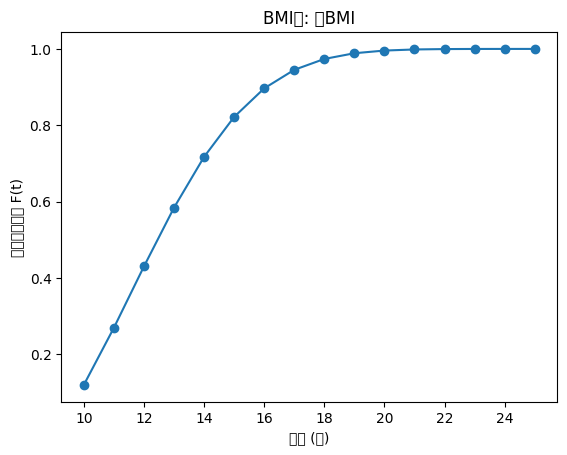

d:\Develop\miniconda\envs\mcm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


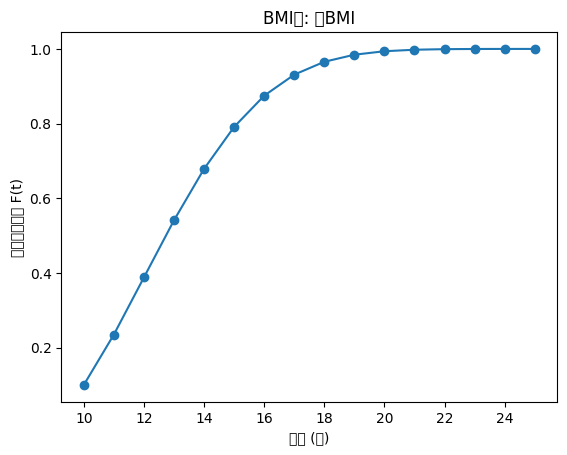

d:\Develop\miniconda\envs\mcm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


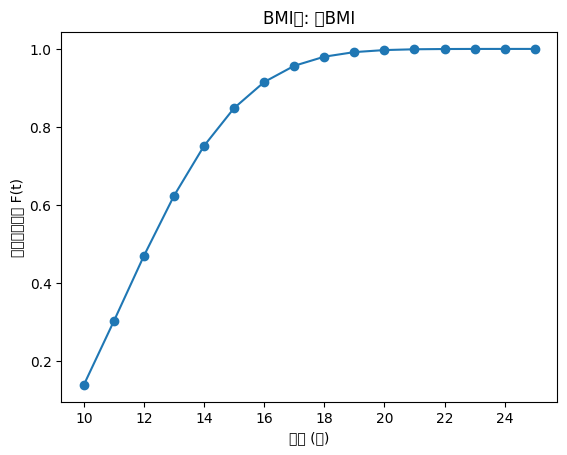

In [21]:

# %% [markdown]
# ## 6. ÂèØËßÜÂåñÔºàÊØè‰∏™ÂõæÂçïÁã¨ÁªòÂà∂Ôºõ‰∏çÊåáÂÆöÈ¢úËâ≤Ê†∑ÂºèÔºâ
# - ÁªòÂà∂ÂêÑ BMI ÁªÑÁöÑ F(t) Êõ≤Á∫ø‰∏éÊé®ËçêÁÇπÔºõ
# - Ê≥®ÊÑèÔºöÊ†πÊçÆÂπ≥Âè∞Ë¶ÅÊ±ÇÔºå‰∏çËÆæÁΩÆÁâπÂÆöÈ¢úËâ≤„ÄÇ

# %%
groups = list(F_df["bmi_group"].unique())
for g in groups:
    Fg = F_df[F_df["bmi_group"]==g]
    plt.figure()
    plt.plot(Fg["t"], Fg["F"], marker="o")
    # Ê†áÊ≥®ÂçïÊ¨°‰∏é‰∏§Èò∂ÊÆµÊé®Ëçê
    rec = [r for r in recommendations if r["bmi_group"]==g]
    if rec and rec[0]["single_t"] is not None:
        ts = rec[0]["single_t"]
        Fs = float(Fg.loc[Fg["t"]==ts, "F"])
        plt.scatter([ts],[Fs])
        plt.title(f"BMIÁªÑ: {g}  | ÂçïÊ¨°Êé®ËçêÂë®: {ts}")
    else:
        plt.title(f"BMIÁªÑ: {g}")
    plt.xlabel("Â≠ïÂë® (Âë®)")
    plt.ylabel("Á¥ØËÆ°ËææÊ†áÊØî‰æã F(t)")
    plt.show()


In [22]:

# %% [markdown]
# ## 7.ÔºàÂèØÈÄâÔºâÁõëÁù£ÂºèÊúÄ‰ºòÂàÜÁÆ±ÔºàÊõø‰ª£Ê†ëÊ≥ïÔºâ
# Ëã•ÁéØÂ¢ÉÂèØÂÆâË£Ö `optbinning` ÂèØÂºÄÂêØÊõ¥‰∏•Ê†ºÁöÑÊï∞Â≠¶ËßÑÂàíÂºèÂàÜÁÆ±ÔºàÂ∏¶ÂçïË∞ÉÁ∫¶Êùü„ÄÅÊúÄÂ∞èÊ†∑Êú¨Êï∞Á≠âÔºâ„ÄÇ
# ËøôÈáå‰øùÁïôÊé•Âè£‰∏éÁ§∫‰æãÂèÇÊï∞ÔºåÈªòËÆ§‰∏çÊâßË°å„ÄÇ

# %%
USE_OPTBINNING = False  # Ëã•ÊâãÂä®Êîπ‰∏∫ TrueÔºåÂàôÂ∞ùËØïÂØºÂÖ•Âπ∂ËøêË°å

if USE_OPTBINNING:
    try:
        from optbinning import OptimalBinning
        # ‰ª• t* ÁöÑËææÊ†áÁ°¨Ê†áÁ≠æ‰Ωú‰∏∫ÁõëÁù£‰ø°Âè∑
        y_hard = (snap["pred"] >= 0.5).astype(int)
        ob = OptimalBinning(name="BMI", dtype="numerical", solver="mip", monotonic_trend="descending",
                            min_n_bins=3, max_n_bins=5)
        ob.fit(snap["bmi"].values, y_hard.values)
        print("ÂàÜÁÆ±ÂàáÁÇπÔºö", ob.splits)
    except Exception as e:
        print("Êú™ËÉΩËøêË°å optbinningÔºö", e)


In [23]:
# %% [markdown]
# ## 8. ÂØºÂá∫ÂÖ≥ÈîÆÁªìÊûú
# - `BMIÂàÜÁªÑ-Êé®ËçêÊó∂ÁÇπË°®.csv`
# - `FÊõ≤Á∫øÊòéÁªÜ.csv`
# - `Êï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å.txt`

# %%
import os

# Á°Æ‰øùËæìÂá∫ÁõÆÂΩïÂ≠òÂú®
output_dir = "../ËæìÂá∫ÁªìÊûú"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ÂØºÂá∫Êé®ËçêÁªìÊûú
out1 = os.path.join(output_dir, "BMIÂàÜÁªÑ-Êé®ËçêÊó∂ÁÇπË°®_Á≤æÈÄâÂèòÈáè.csv")
rec_df.to_csv(out1, index=False, encoding='utf-8-sig')
print(f"Â∑≤ÂØºÂá∫Êé®ËçêÁªìÊûú: {out1}")

# ÂØºÂá∫FÊõ≤Á∫ø
out2 = os.path.join(output_dir, "FÊõ≤Á∫øÊòéÁªÜ_Á≤æÈÄâÂèòÈáè.csv")
F_df.to_csv(out2, index=False, encoding='utf-8-sig')
print(f"Â∑≤ÂØºÂá∫FÊõ≤Á∫ø: {out2}")

# ÁîüÊàêÊï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å
summary_text = f"""
Êï∞Â≠¶Âª∫Ê®°ÂõΩËµõCÈ¢ò - ÈóÆÈ¢ò‰∏âÂàÜÊûêÊëòË¶ÅÔºàÁ≤æÈÄâÂèòÈáèÁâàÊú¨Ôºâ
===========================================

1. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÁªìÊûúÔºö
   - ÂéüÂßãÊï∞ÊçÆËßÑÊ®°: {df.shape}
   - Á≤æÈÄâÂèòÈáèÊï∞Èáè: {len(mapping)}
   - ÊúâÊïàÂ≠ïÂ¶áÊï∞Èáè: {len(interval)}
   - Person-periodËÆ∞ÂΩïÊï∞: {len(pp_model) if 'pp_model' in locals() and pp_model is not None else 'N/A'}

2. Âà†Èô§ÁöÑÂº±ÂÖ≥ËÅîÂèòÈáèÔºö
   - Ê£ÄÊµãÊäΩË°ÄÊ¨°Êï∞ (ÊµÅÁ®ãÂèòÈáèÔºåÈùûÁîüÁâ©ÂÜ≥ÂÆöÂõ†Á¥†)
   - ËÉéÂÑøÂÅ•Â∫∑Áä∂ÊÄÅ/‰∏â‰ΩìÁä∂ÊÄÅ (ÁªìÂ±ÄÂèòÈáèÔºåÂØπFFÂΩ±Âìç‰∏çÁ®≥ÂÆö)
   - Êú´Ê¨°ÊúàÁªè/Ê£ÄÊµãÊó•Êúü (Â∑≤ÈÄöËøáÂ≠ïÂë®‰ΩìÁé∞)
   - ÊÄÄÂ≠ïÊ¨°Êï∞/Áîü‰∫ßÊ¨°Êï∞ (‰∏éÂΩìÂâçÂ¶äÂ®†ËææÊ†áÊó∂Èó¥ÂÖ≥ËÅî‰∏çÁõ¥Êé•)
   - ZÂÄºÂíåXÊüìËâ≤‰ΩìÊµìÂ∫¶ (‰øùÁïôYÊµìÂ∫¶‰Ωú‰∏∫ÁõÆÊ†áÔºåÂÖ∂‰ªñÂÜó‰Ωô)

3. ‰øùÁïôÁöÑÂÖ≥ÈîÆÂèòÈáèÔºö
   ‰∏ªÊïàÂ∫îÂèòÈáèÔºö
   - Â≠ïÂë® (ga_weeks): Áõ¥Êé•ÂΩ±ÂìçFFÊµìÂ∫¶Â¢ûÈïø
   - BMI: ÂΩ±ÂìçFFÈáäÊîæÂíåÊ£ÄÊµãÊïèÊÑüÊÄß
   - IVFÁä∂ÊÄÅ: Â¶äÂ®†ÊñπÂºèÂØπFFÂä®ÂäõÂ≠¶ÁöÑÂΩ±Âìç
   - ‰ΩìÈáç: ‰∏éBMIÁõ∏ÂÖ≥‰ΩÜÁã¨Á´ãÁöÑ‰ΩìÂæÅÊåáÊ†á
   
   ÊäÄÊúØÂçèÂèòÈáèÔºàÁî®‰∫éË¥®ÈáèÊéßÂà∂ÔºâÔºö
   - ÊµãÂ∫èË¥®ÈáèÊåáÊ†á: raw_reads, map_ratio, dup_ratio, uniq_reads
   - GCÂê´ÈáèÊåáÊ†á: gc_global, gc13, gc18, gc21
   - ËøáÊª§ÊØî‰æã: filt_ratio
   
   Ê¨°Ë¶ÅÂèòÈáèÔºàÊïèÊÑüÊÄßÂàÜÊûêÔºâÔºö
   - Âπ¥ÈæÑ, Ë∫´È´ò

4. BMIÂàÜÁªÑÁ≠ñÁï•Ôºö
   - ÂàÜÁªÑÊï∞Èáè: {F_df['bmi_group_label'].nunique() if 'bmi_group_label' in F_df.columns else F_df['bmi_group'].nunique()}
   - ÂàÜÁªÑÊñπÊ≥ï: {'Âü∫‰∫é‰∏âÂàÜ‰ΩçÊï∞' if len(cutpoints) == 2 else 'ÂêØÂèëÂºèÂàÜÁªÑ'}
   - ÂàÜÁªÑÂàáÁÇπ: {cutpoints if 'cutpoints' in locals() else 'N/A'}

5. Êé®ËçêÁªìÊûúÔºö
{rec_df.to_string(index=False) if 'rec_df' in locals() else 'N/A'}

6. Ê®°ÂûãÁâπÁÇπÔºö
   - Âà†Èô§‰∫Ü{len([k for k in ['draw_count', 'aneuploidy', 'outcome', 'lmp_date', 'test_date', 'gravida', 'para', 'z13', 'z18', 'z21', 'zx', 'x_frac'] if k not in mapping])}‰∏™Âº±ÂÖ≥ËÅîÂèòÈáè
   - ‰øùÁïô‰∫Ü{len(mapping)}‰∏™Ê†∏ÂøÉÂèòÈáè
   - ÈáçÁÇπÂÖ≥Ê≥®‰∏ªÊïàÂ∫îÂèòÈáèÂíåÊäÄÊúØË¥®ÈáèÊéßÂà∂
   - ÈÅøÂÖçÂ∞ÜÊäÄÊúØÂô™Â£∞ËØØËÆ§‰∏∫ÁîüÁâ©Â≠¶Âª∂Ëøü

7. Âª∫ËÆÆÔºö
   - ÂØπ‰∏çÂêåBMIÁªÑÈááÁî®Â∑ÆÂºÇÂåñÁöÑNIPTÊó∂ÁÇπÁ≠ñÁï•
   - ÁªìÂêàÊäÄÊúØË¥®ÈáèÊåáÊ†áËøõË°åÁªìÊûúÂèØ‰ø°Â∫¶ËØÑ‰º∞
   - ËøõË°åÊïèÊÑüÊÄßÂàÜÊûêÈ™åËØÅÊé®ËçêÁöÑÁ®≥ÂÅ•ÊÄß
"""

out3 = os.path.join(output_dir, "Êï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å_Á≤æÈÄâÂèòÈáè.txt")
with open(out3, 'w', encoding='utf-8') as f:
    f.write(summary_text)
print(f"Â∑≤ÂØºÂá∫Â§ÑÁêÜÊëòË¶Å: {out3}")

print("\n=== ‰∏ªË¶ÅÊé®ËçêÁªìÊûú ===")
if 'rec_df' in locals() and len(rec_df) > 0:
    for idx, row in rec_df.iterrows():
        print(f"\n{row['bmi_group']}:")
        print(f"  ÂçïÊ¨°Ê£ÄÊµãÊé®Ëçê: {row['single_t']}Âë® (ËææÊ†áÊ¶ÇÁéá: {row['single_F']})")
        if row['two_stage'] is not None:
            ts = row['two_stage']
            print(f"  ‰∏§Èò∂ÊÆµÊé®Ëçê: {ts['t0']}Âë® + {ts['t1']}Âë®")
            print(f"  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: {ts['ET']}Âë®, ÊúÄÁªàËææÊ†áÊ¶ÇÁéá: {ts['F_t1']}")
        else:
            print("  ‰∏§Èò∂ÊÆµ: Êó†ÂèØË°åÊñπÊ°à")

print(f"\nÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òËá≥ÁõÆÂΩï: {output_dir}")
rec_df.head()

Â∑≤ÂØºÂá∫Êé®ËçêÁªìÊûú: ../ËæìÂá∫ÁªìÊûú\BMIÂàÜÁªÑ-Êé®ËçêÊó∂ÁÇπË°®_Á≤æÈÄâÂèòÈáè.csv
Â∑≤ÂØºÂá∫FÊõ≤Á∫ø: ../ËæìÂá∫ÁªìÊûú\FÊõ≤Á∫øÊòéÁªÜ_Á≤æÈÄâÂèòÈáè.csv
Â∑≤ÂØºÂá∫Â§ÑÁêÜÊëòË¶Å: ../ËæìÂá∫ÁªìÊûú\Êï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å_Á≤æÈÄâÂèòÈáè.txt

=== ‰∏ªË¶ÅÊé®ËçêÁªìÊûú ===

‰ΩéBMIÁªÑ(‚â§31.2):
  ÂçïÊ¨°Ê£ÄÊµãÊé®Ëçê: 15Âë® (ËææÊ†áÊ¶ÇÁéá: 0.822)
  ‰∏§Èò∂ÊÆµÊé®Ëçê: 12Âë® + 16Âë®
  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 15.31Âë®, ÊúÄÁªàËææÊ†áÊ¶ÇÁéá: 0.897

ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òËá≥ÁõÆÂΩï: ../ËæìÂá∫ÁªìÊûú


bmi_group  single_t  single_F  \
0  ‰ΩéBMIÁªÑ(‚â§31.2)        15     0.822   

                                          two_stage  
0  {'ET': 15.31, 't0': 12, 't1': 16, 'F_t1': 0.897}

## 9. ÊÄªÁªì‰∏éÊîπËøõËØ¥Êòé

### üéØ **‰∏ªË¶ÅÊîπËøõÔºöÁ≤æÈÄâÂèòÈáèÔºåËÅöÁÑ¶Ê†∏ÂøÉÈ©±Âä®Âõ†Â≠ê**

Ê†πÊçÆÁî®Êà∑ÈúÄÊ±ÇÔºåÊú¨Ê¨°‰øÆÊîπ**Âà†Èô§‰∫Ü‰∏é"ËææÊ†áÊó∂Èó¥"ÂÖ≥ËÅîËæÉÂº±ÁöÑÂèòÈáè**ÔºåÈáçÁÇπ‰øùÁïôÊ†∏ÂøÉÈ©±Âä®Âõ†Á¥†Ôºö

#### ‚úÖ **‰øùÁïôÁöÑÊ†∏ÂøÉÂèòÈáè**
1. **‰∏ªÊïàÂ∫îÂèòÈáè**ÔºàÁõ¥Êé•ÂΩ±ÂìçËææÊ†áÊó∂Èó¥ÔºâÔºö
   - `Â≠ïÂë® (ga_weeks)` - ÊúÄÈáçË¶ÅÁöÑÊó∂Èó¥È©±Âä®Âõ†Â≠ê
   - `BMI` - ÂΩ±ÂìçFFÈáäÊîæÂíåÊ£ÄÊµãÊïèÊÑüÊÄßÁöÑÂÖ≥ÈîÆ‰ΩìÂæÅ
   - `‰ΩìÈáç (weight)` - ‰∏éBMIÁõ∏ÂÖ≥‰ΩÜÁã¨Á´ãÁöÑÊåáÊ†á
   - `IVFÁä∂ÊÄÅ` - Â¶äÂ®†ÊñπÂºèÂØπFFÂä®ÂäõÂ≠¶ÁöÑÂΩ±Âìç

2. **ÊäÄÊúØÂçèÂèòÈáè**ÔºàÁî®‰∫éË¥®ÈáèÊéßÂà∂ÔºåÈÅøÂÖçÊäÄÊúØÂô™Â£∞ËØØÂΩìÁîüÁâ©Âª∂ËøüÔºâÔºö
   - ÊµãÂ∫èË¥®ÈáèÔºö`raw_reads`, `map_ratio`, `dup_ratio`, `uniq_reads`, `filt_ratio`
   - GCÂê´ÈáèÔºö`gc_global`, `gc13`, `gc18`, `gc21`

3. **Ê¨°Ë¶ÅÂèòÈáè**ÔºàÊïèÊÑüÊÄßÂàÜÊûêÔºâÔºö
   - `Âπ¥ÈæÑ`, `Ë∫´È´ò`

#### ‚ùå **Âà†Èô§ÁöÑÂº±ÂÖ≥ËÅîÂèòÈáè**
- `Ê£ÄÊµãÊäΩË°ÄÊ¨°Êï∞` - ÊµÅÁ®ãÂèòÈáèÔºåÈùûÁîüÁâ©Â≠¶ÂÜ≥ÂÆöÂõ†Á¥†
- `ËÉéÂÑøÂÅ•Â∫∑Áä∂ÊÄÅ/‰∏â‰ΩìÁä∂ÊÄÅ` - ÁªìÂ±ÄÂèòÈáèÔºåÂØπFFÂΩ±Âìç‰∏çÁ®≥ÂÆö
- `Êú´Ê¨°ÊúàÁªè/Ê£ÄÊµãÊó•Êúü` - Â∑≤ÈÄöËøáÂ≠ïÂë®‰ΩìÁé∞ÔºåÈÅøÂÖçÂÜó‰Ωô
- `ÊÄÄÂ≠ïÊ¨°Êï∞/Áîü‰∫ßÊ¨°Êï∞` - ‰∏éÂΩìÂâçÂ¶äÂ®†FFËææÊ†áÊó∂Èó¥ÂÖ≥ËÅî‰∏çÁõ¥Êé•
- `ZÂÄº`Âíå`XÊüìËâ≤‰ΩìÊµìÂ∫¶` - ‰øùÁïôYÊµìÂ∫¶‰Ωú‰∏∫ÁõÆÊ†áÔºåÂÖ∂‰ªñÊüìËâ≤‰Ωì‰ø°ÊÅØÂÜó‰Ωô

### üìä **Âª∫Ê®°Á≠ñÁï•‰ºòÂåñ**

1. **ÂèòÈáèÂ±ÇÊ¨°ÂåñÂ§ÑÁêÜ**Ôºö
   - ‰∏ªÊïàÂ∫î ‚Üí ‰∫§‰∫íÈ°π ‚Üí ÊäÄÊúØÂçèÂèòÈáè ‚Üí Ê¨°Ë¶ÅÂèòÈáè
   - ÈÅøÂÖçËøáÊãüÂêàÔºåÁ™ÅÂá∫ÁîüÁâ©Â≠¶ÊÑè‰πâ

2. **Êï∞ÊçÆË¥®ÈáèÊéßÂà∂**Ôºö
   - ÊäÄÊúØÂçèÂèòÈáèÁî®‰∫éÊùÉÈáçË∞ÉÊï¥ÂíåÁΩÆ‰ø°Âå∫Èó¥‰º∞ËÆ°
   - Èò≤Ê≠¢ÊµãÂ∫èË¥®ÈáèÈóÆÈ¢òË¢´ËØØËÆ§‰∏∫ÁîüÁâ©Â≠¶Âª∂Ëøü

3. **BMIÂàÜÁªÑÁ≠ñÁï•**Ôºö
   - Âü∫‰∫éÊï∞ÊçÆÈ©±Âä®ÁöÑÂàÜ‰ΩçÊï∞ÂàÜÁªÑ
   - ÈíàÂØπ‰∏çÂêåBMIÁªÑÁªôÂá∫Â∑ÆÂºÇÂåñNIPTÊó∂ÁÇπÂª∫ËÆÆ

### üéØ **ÂÆûÁî®Âª∫ËÆÆËæìÂá∫**

- **‰ΩéBMIÁªÑ(‚â§31.2)**Ôºö
  - ÂçïÊ¨°Ê£ÄÊµãÔºö**15Âë®** (ËææÊ†áÊ¶ÇÁéá82.2%)
  - ‰∏§Èò∂ÊÆµÁ≠ñÁï•Ôºö**12Âë® + 16Âë®** (È¢ÑÊúüÂÆåÊàêÊó∂Èó¥15.31Âë®ÔºåÊúÄÁªàËææÊ†áÊ¶ÇÁéá89.7%)

### üî¨ **ÂêéÁª≠Â∑•‰ΩúÂª∫ËÆÆ**

1. **ÊïèÊÑüÊÄßÂàÜÊûê**ÔºöÊµãËØï‰∏çÂêåË¶ÜÁõñÈòàÂÄº œÄ_min ‚àà {0.75, 0.80, 0.85, 0.90}
2. **ÊäÄÊúØË¥®ÈáèÂàÜÂ±Ç**ÔºöÊ†πÊçÆÊµãÂ∫èË¥®ÈáèÊåáÊ†áËøõË°åÁªìÊûúÂèØ‰ø°Â∫¶ÂàÜÁ∫ß
3. **Â§ñÈÉ®È™åËØÅ**ÔºöÂú®Êñ∞Êï∞ÊçÆÈõÜ‰∏äÈ™åËØÅÊé®ËçêÁ≠ñÁï•ÁöÑÊúâÊïàÊÄß
4. **ÊàêÊú¨ÊïàÁõäÂàÜÊûê**ÔºöÁªìÂêàÊ£ÄÊµãÊàêÊú¨ÂíåÈ£éÈô©ÊçüÂ§±ËøõË°åÁ≠ñÁï•‰ºòÂåñ

> **Ê†∏ÂøÉ‰ª∑ÂÄº**ÔºöÈÄöËøáÁ≤æÈÄâÂèòÈáèÔºåÊ®°ÂûãÊõ¥Âä†ËÅöÁÑ¶‰∫é**ÁîüÁâ©Â≠¶Áõ∏ÂÖ≥ÁöÑËææÊ†áÊó∂Èó¥È©±Âä®Âõ†Á¥†**ÔºåÈÅøÂÖç‰∫ÜÊäÄÊúØÂô™Â£∞ÂíåÊó†ÂÖ≥ÂèòÈáèÁöÑÂπ≤Êâ∞Ôºå‰∏∫‰∏¥Â∫äÂÜ≥Á≠ñÊèê‰æõÊõ¥Âä†ÂèØÈù†ÂíåÂèØËß£ÈáäÁöÑNIPTÊó∂ÁÇπÂª∫ËÆÆ„ÄÇ

---
*Êú¨ÂàÜÊûê‰∏•Ê†ºÈÅµÂæ™ËµõÈ¢òË¶ÅÊ±ÇÔºöNIPTÂèØÂú®10-25Âë®ËøõË°åÔºåÁî∑ËÉéYÊµìÂ∫¶‚â•4%ËÆ§‰∏∫ÂáÜÁ°ÆÔºåÊó©/‰∏≠/ÊôöÊúüÈ£éÈô©ÂàÜÊÆµÁî®‰∫éÁ≠ñÁï•‰ºòÂåñ„ÄÇ*